In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
history_steps = 50
forecast_steps = 10
(x_train, y_train), (x_val, y_val), (x_test, y_test) = \
    utils.load_time_series_data_multiple_forecast(history_steps, forecast_steps)
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000, 50, 10)
x_val.shape = (2000, 50, 1), y_val.shape = (2000, 50, 10)
x_test.shape = (1000, 50, 1), y_test.shape = (1000, 50, 10)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding='valid', input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer=keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', last_time_step_mse])
history = model.fit(x_train, y_train[:, 3::2], epochs=20, validation_data=(x_val, y_val[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0403 - mae: 0.1518 - last_time_step_mse: 0.0321 - val_loss: 0.0244 - val_mae: 0.1160 - val_last_time_step_mse: 0.0144
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0209 - mae: 0.1047 - last_time_step_mse: 0.0105 - val_loss: 0.0167 - val_mae: 0.0896 - val_last_time_step_mse: 0.0060
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0163 - mae: 0.0885 - last_time_step_mse: 0.0059 - val_loss: 0.0165 - val_mae: 0.0906 - val_last_time_step_mse: 0.0067
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0150 - mae: 0.0841 - last_time_step_mse: 0.0052 - val_loss: 0.0141 - val_mae: 0.0803 - val_last_time_step_mse: 0.0047
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0140 - mae: 0.0807 - last_time_step_mse: 0.0046 - val_loss: 0.0133 - val_mae: 0.0772 - val_last_time_step_mse: 0.0041
Epoch 6/20
219/219 [=====

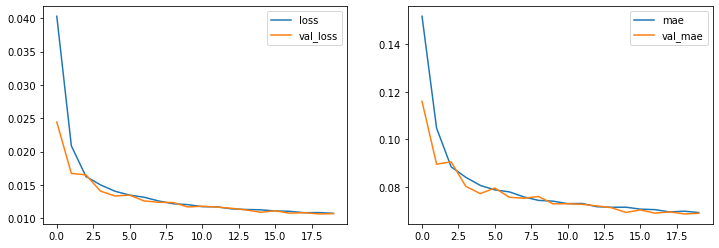

In [4]:
utils.plot_history(history)

In [6]:
model.evaluate(x_val, y_val[:, 3::2])

63/63 [==============================] - 0s 3ms/step - loss: 0.0107 - mae: 0.0689 - last_time_step_mse: 0.0033


[0.0106879323720932, 0.06893260031938553, 0.003336662659421563]

series.shape = (1, 60)
x_new.shape = (1, 50, 1), y_new.shape = (1, 10)
y_pred.shape = (1, 24, 10)


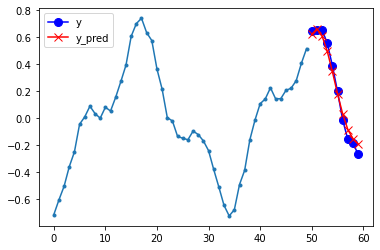

In [7]:
series = utils.generate_time_series(1, history_steps + forecast_steps, seed=43)
print(f"series.shape = {series.shape}")
x_new, y_new = series[:, :history_steps], series[:, -forecast_steps:]
x_new = np.expand_dims(x_new, -1)
print(f"x_new.shape = {x_new.shape}, y_new.shape = {y_new.shape}")

y_pred = model.predict(x_new)
print(f"y_pred.shape = {y_pred.shape}")
utils.plot_series_multiple_forecasts(x_new, y_new, y_pred[0, -1, :])